## First Neural Network with PyTorch

In [1]:
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__, np.__version__

('2.0.0+cu117', '1.24.2')

In [9]:
def create_data():
    weight = 0.7
    bias = 0.3
    
    X = torch.arange(0, 1, 0.02).unsqueeze(dim=1)
    y = X * weight + bias
    
    return X, y


def plot_predictions(X_tr, y_tr, X_te, predictions=None):
    plt.figure(figsize=(10,7))
    plt.scatter(X_tr, y_tr, c="b", label="Testing data")
    
    if predictions is not None:
        plt.scatter(X_te, predictions, c="r", label="Predictions")
    
    plt.legend()

In [10]:
# Creating data
X, y = create_data()

# Splitting data into training and test set 
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

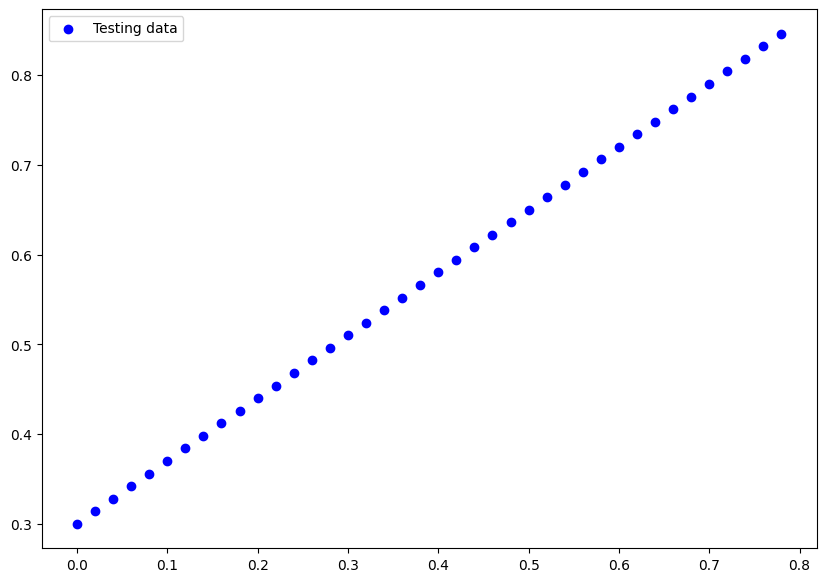

In [11]:
#Visualizing data
plot_predictions(X_train, y_train, X_test)

In [12]:
# Building the model 

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [13]:
# Check the model's random parameters

model = LinearRegressionModel()
model.state_dict()

OrderedDict([('weights', tensor([0.7112])), ('bias', tensor([-1.3900]))])

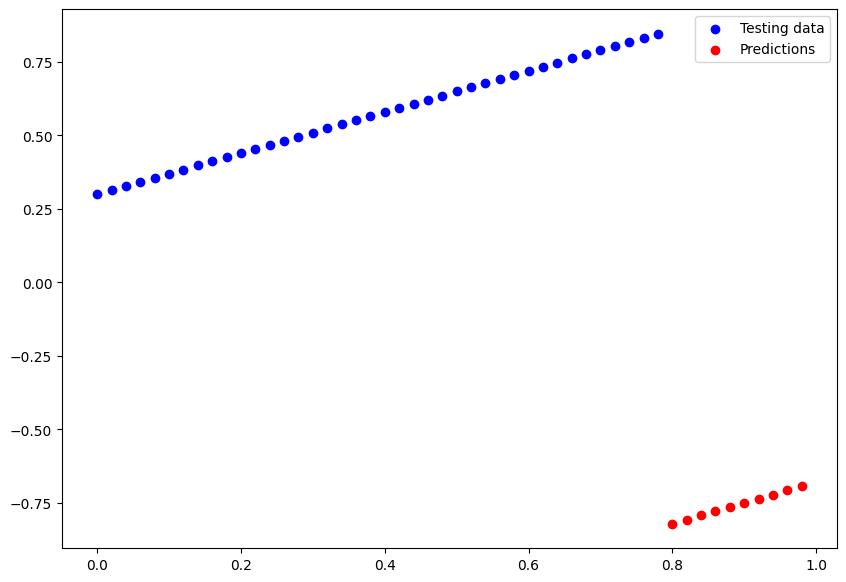

In [14]:
# Make predictions with the model that has random parameters

with torch.inference_mode():
    y_pred = model(X_test)
    
plot_predictions(X_train, y_train, X_test, predictions=y_pred)


In [15]:
# Creating a loss function

loss_function = nn.L1Loss() # MAE loss = l1 loss

# Creating an optimizer (Stochastic Gradient Descent)
# with learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)


In [27]:
epochs = 200

for epoch in range(epochs):
    # Training 
    model.train()
    y_pred = model(X_train)
    loss = loss_function(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Testing
    model.eval()
    with torch.inference_mode():
        y_pred = model(X_test)
        test_loss = loss_function(y_pred, y_test)
        
        if epoch % 20 == 0:
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.00394964125007391 | MAE Test Loss: 0.00507806520909071 
Epoch: 20 | MAE Train Loss: 0.00394964125007391 | MAE Test Loss: 0.00507806520909071 
Epoch: 40 | MAE Train Loss: 0.00394964125007391 | MAE Test Loss: 0.00507806520909071 
Epoch: 60 | MAE Train Loss: 0.00394964125007391 | MAE Test Loss: 0.00507806520909071 
Epoch: 80 | MAE Train Loss: 0.00394964125007391 | MAE Test Loss: 0.00507806520909071 
Epoch: 100 | MAE Train Loss: 0.00394964125007391 | MAE Test Loss: 0.00507806520909071 
Epoch: 120 | MAE Train Loss: 0.00394964125007391 | MAE Test Loss: 0.00507806520909071 
Epoch: 140 | MAE Train Loss: 0.00394964125007391 | MAE Test Loss: 0.00507806520909071 
Epoch: 160 | MAE Train Loss: 0.00394964125007391 | MAE Test Loss: 0.00507806520909071 
Epoch: 180 | MAE Train Loss: 0.00394964125007391 | MAE Test Loss: 0.00507806520909071 


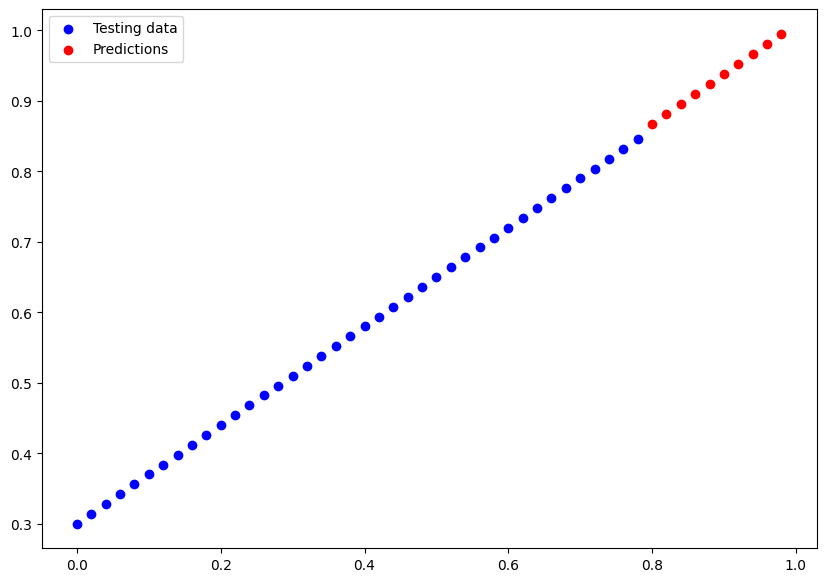

In [28]:
plot_predictions(X_train, y_train, X_test, predictions=y_pred)

In [29]:
model.state_dict()

OrderedDict([('weights', tensor([0.7089])), ('bias', tensor([0.3005]))])

In [30]:
def save_model(model, name):
    from pathlib import Path

    # 1. Create models directory 
    MODEL_PATH = Path("models")
    MODEL_PATH.mkdir(parents=True, exist_ok=True)

    # 2. Create model save path 
    MODEL_NAME = f"{name}.pth"
    MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

    # 3. Save the model state dict 
    print(f"Saving model to: {MODEL_SAVE_PATH}")
    torch.save(obj=model.state_dict(), # only saving the state_dict() only saves the models learned parameters
            f=MODEL_SAVE_PATH)
    
def load_model(model, name):
    MODEL_SAVE_PATH = f"models/{name}.pth"
    # Instantiate a new instance of our model (this will be instantiated with random weights)
    loaded_model = LinearRegressionModel()

    # Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
    loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
    
    return loaded_model

In [31]:
save_model(model, "FirstNN")

Saving model to: models\FirstNN.pth
